In [25]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# reading the data
df = pd.read_csv('./data/SAP Dataset 2016-2021 - XETRA EUR.csv')

# looking at the first five rows of the data
print(df.head())
print('\n Shape of the data:')
print(df.shape)


         Date       Open       High        Low      Close  Adj Close   Volume
0  2016-11-09  76.449997  78.529999  75.500000  78.529999  71.981308  4242667
1  2016-11-10  79.070000  79.199997  76.889999  77.379997  70.927216  3303639
2  2016-11-11  77.680000  77.989998  75.629997  76.449997  70.074768  3323169
3  2016-11-14  77.089996  77.110001  75.559998  75.839996  69.515633  2721927
4  2016-11-15  76.239998  76.279999  75.070000  75.970001  69.634796  2433644

 Shape of the data:
(1267, 7)


In [27]:
# setting the index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

# NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component. So here we have set the last year’s data into validation and the 4 years’ data before that into train set.

# splitting into train and validation (80% / 20%)
train = new_data[:1014]
valid = new_data[1014:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)
print(train.head())

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)
print(valid.head())




 Shape of training set:
(1014, 2)
                  Date      Close
0  2016-11-09 00:00:00  78.529999
1  2016-11-10 00:00:00  77.379997
2  2016-11-11 00:00:00  76.449997
3  2016-11-14 00:00:00  75.839996
4  2016-11-15 00:00:00  75.970001

 Shape of validation set:
(253, 2)
                     Date       Close
1014  2020-11-10 00:00:00   99.089996
1015  2020-11-11 00:00:00  101.519997
1016  2020-11-12 00:00:00  100.279999
1017  2020-11-13 00:00:00  101.220001
1018  2020-11-16 00:00:00  100.279999


In [28]:
# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
11.709578364627047


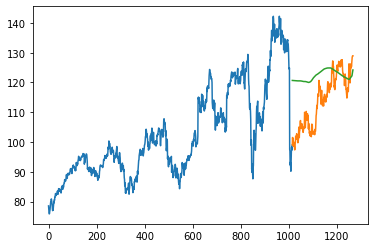

In [29]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])